# Machine Learning Project Group 8


##### Group 8:

Jogeir Jonnyson Sætre Liavåg

Jacopo Fidelio

Mirnes Sabaredzovic

# Getting the data

In [1]:
import tarfile
import urllib
import pandas as pd
import numpy as np

# Reads in the csv-files and creates a dataframe using pandas
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


In [2]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Looking for correlation between attributes

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

#### Splitting attributes into categorical features and numerical features

In [5]:
num_cols = [col for col in train.columns if (train[col].dtype in ("int32", "int64", "float64"))]
cat_cols = [col for col in train.columns if (train[col].dtype == 'object')]
print(f"Number of numerical columns in train set: {len(num_cols)}")
print(f"Number of categorical columns in train set: {len(cat_cols)}")

Number of numerical columns in train set: 38
Number of categorical columns in train set: 43


In [6]:
cat_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                'LotConfig', 'LandSlope', 'Neighborhood',
 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                'Exterior2nd', 'MasVnrType',
 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                'BsmtFinType2', 'Heating',
 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                'GarageFinish', 'GarageQual',
 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

In [7]:
num_features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

### Pycaret environment setup

In [8]:
from pycaret.regression import *
data = setup(data=train, target='SalePrice', numeric_imputation='median', normalize=True,normalize_method='robust',
            categorical_features = cat_features, numeric_features= num_features,
            remove_outliers=True, remove_multicollinearity=True)

best_specific = compare_models(n_select=4, sort='RMSE')


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,14381.8125,518954286.4974,22134.2088,0.9131,0.1185,0.0842,6.0130
gbr,Gradient Boosting Regressor,15501.3800,548940081.3645,22916.9720,0.9070,0.1285,0.0927,0.3300
br,Bayesian Ridge,15734.7983,570525830.4296,23375.2585,0.9009,0.1292,0.0936,0.0720
ridge,Ridge Regression,16274.8788,597992777.2928,24042.4729,0.8952,0.1366,0.0970,0.0150
lightgbm,Light Gradient Boosting Machine,16360.6957,644438407.4148,24958.1388,0.8912,0.1330,0.0948,0.1930
llar,Lasso Least Angle Regression,16768.9295,644460530.8768,24998.5102,0.8856,0.1554,0.1004,0.0550
lasso,Lasso Regression,16986.5284,658774519.7909,25305.6596,0.8827,0.1575,0.1020,0.0800
lr,Linear Regression,17028.4653,662933343.0861,25374.1634,0.8819,0.1576,0.1023,0.7310
rf,Random Forest Regressor,17262.2863,726791898.0396,26233.1559,0.8807,0.1433,0.1027,0.9100
omp,Orthogonal Matching Pursuit,17958.8979,725810361.6115,26499.5466,0.8726,0.1535,0.1069,0.0150


### Creating models

We now want to create the top3 model with the best score

In [9]:
br=create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17020.3039,672889619.1339,25940.1160,0.8834,0.1315,0.0956
1,14399.9452,332350893.8967,18230.4935,0.9427,0.1017,0.0805
2,14502.2853,413153689.5837,20326.1824,0.8947,0.1317,0.0923
3,12940.7876,326112633.2124,18058.5889,0.9188,0.1021,0.0754
4,18567.6942,796064548.9253,28214.6159,0.9147,0.1348,0.0984
5,20202.7475,861615108.1155,29353.2810,0.9011,0.1507,0.1156
6,15688.7616,778880467.2884,27908.4300,0.8208,0.1417,0.0980
7,14931.7219,380643501.1045,19510.0872,0.9086,0.1263,0.0964
8,16979.3144,856316257.9284,29262.8819,0.8766,0.1594,0.1056
9,12114.4210,287231585.1070,16947.9080,0.9474,0.1121,0.0779


In [10]:
catboost=create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16668.4038,829920623.7622,28808.3430,0.8561,0.1154,0.0852
1,13220.6791,282296232.7380,16801.6735,0.9513,0.0942,0.0736
2,14221.2016,374651138.3640,19355.9071,0.9045,0.1146,0.0857
3,12178.3919,302486953.6748,17392.1521,0.9247,0.1248,0.0812
4,16942.6184,873846500.0808,29560.8948,0.9064,0.1314,0.0875
5,17443.4583,844331136.2640,29057.3766,0.9031,0.1282,0.0956
6,13651.9472,421628743.2031,20533.6003,0.9030,0.1247,0.0871
7,12398.0918,262115085.9293,16189.9687,0.9370,0.0996,0.0776
8,15248.9602,708312827.7464,26614.1471,0.8979,0.1475,0.0934
9,11844.3726,289953623.2111,17028.0246,0.9469,0.1042,0.0752


In [11]:
ridge=create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17082.0672,663066288.8412,25750.0736,0.8851,0.1387,0.0968
1,14878.1529,384026647.0592,19596.5978,0.9338,0.1061,0.0818
2,15422.4484,465858562.0376,21583.7569,0.8813,0.1424,0.0982
3,14096.6055,398979166.2637,19974.4629,0.9006,0.1167,0.0820
4,19198.8732,823490168.7091,28696.5184,0.9118,0.1409,0.1040
5,20177.1847,851549133.2630,29181.3148,0.9022,0.1590,0.1174
6,16142.8865,759452428.1031,27558.1645,0.8253,0.1488,0.0998
7,15857.3843,426693413.2348,20656.5586,0.8975,0.1321,0.1017
8,17561.6844,907345023.5793,30122.1683,0.8692,0.1640,0.1090
9,12331.5005,299466941.8369,17305.1132,0.9452,0.1171,0.0792


### Tuning models

In [12]:
tuned_br=tune_model(br, optimize= 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17020.3040,672889627.0564,25940.1162,0.8834,0.1315,0.0956
1,14399.9451,332350887.8872,18230.4934,0.9427,0.1017,0.0805
2,14502.2853,413153685.3910,20326.1823,0.8947,0.1317,0.0923
3,12940.7876,326112626.3221,18058.5887,0.9188,0.1021,0.0754
4,18567.6943,796064555.9779,28214.6160,0.9147,0.1348,0.0984
5,20202.7475,861615112.8800,29353.2811,0.9011,0.1507,0.1156
6,15688.7616,778880476.0544,27908.4302,0.8208,0.1417,0.0980
7,14931.7218,380643499.0507,19510.0871,0.9086,0.1263,0.0964
8,16979.3144,856316254.5297,29262.8819,0.8766,0.1594,0.1056
9,12114.4211,287231588.2499,16947.9081,0.9474,0.1121,0.0779


In [13]:
tuned_catboost=tune_model(catboost, optimize= 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18343.4020,867015266.1792,29445.1230,0.8497,0.1286,0.0970
1,15301.2065,433631312.6078,20823.8160,0.9252,0.1083,0.0841
2,14552.8194,395680399.1704,19891.7168,0.8991,0.1187,0.0881
3,14004.4176,351451814.9164,18747.0482,0.9125,0.1350,0.0931
4,18153.3458,875797976.7875,29593.8841,0.9062,0.1322,0.0952
5,19095.4041,901333232.3495,30022.2123,0.8965,0.1383,0.1067
6,14898.1618,495313882.4771,22255.6483,0.8860,0.1327,0.0937
7,12880.1717,312933080.4655,17689.9147,0.9248,0.1030,0.0789
8,17202.3995,773865829.7892,27818.4441,0.8885,0.1529,0.1042
9,13201.6309,360334510.4667,18982.4790,0.9340,0.1099,0.0808


In [14]:
tuned_ridge=tune_model(ridge, optimize= 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17001.1409,666755995.6000,25821.6188,0.8844,0.1314,0.0955
1,14444.3806,336948643.8231,18356.1609,0.9419,0.1022,0.0807
2,14520.5375,416298738.5646,20403.4002,0.8939,0.1324,0.0926
3,13013.5801,331541005.9904,18208.2675,0.9174,0.1030,0.0757
4,18553.6919,792455774.0890,28150.5910,0.9151,0.1350,0.0985
5,20169.1376,858878279.7522,29306.6252,0.9014,0.1510,0.1155
6,15693.4269,771880210.0297,27782.7322,0.8224,0.1416,0.0979
7,15023.7448,382608485.6981,19560.3805,0.9081,0.1267,0.0971
8,16984.2801,856686367.9430,29269.2051,0.8765,0.1594,0.1056
9,12024.0097,284942033.3935,16880.2261,0.9478,0.1122,0.0774


Tuning did not really improve our results so we might try with blending the models

### Blending models

In [15]:
blender_specific = blend_models(estimator_list = [br,catboost,ridge])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16043.5386,657820297.1566,25648.0077,0.8860,0.1175,0.0876
1,12378.8732,269376496.6918,16412.6932,0.9536,0.0874,0.0674
2,13312.3925,358455135.2230,18932.9114,0.9086,0.1214,0.0841
3,11913.1221,286870072.1071,16937.2392,0.9286,0.0979,0.0713
4,16960.7036,744340429.6828,27282.6031,0.9202,0.1266,0.0891
5,18607.2141,807427191.0322,28415.2633,0.9073,0.1387,0.1048
6,13791.6024,497754888.0480,22310.4211,0.8855,0.1294,0.0866
7,13240.5357,304074892.0009,17437.7433,0.9270,0.1116,0.0846
8,15478.4609,764024057.3698,27640.9851,0.8899,0.1500,0.0955
9,10794.0380,240306818.5332,15501.8327,0.9560,0.0969,0.0682


Results improved!

In [16]:
blender_specific

VotingRegressor(estimators=[('br',
                             BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False)),
                            ('catboost',
                             <catboost.core.CatBoostRegressor object at 0x000001DD4C9E39D0>),
                            ('ridge',
                             Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=8846, solver='auto',
                                   tol=0.001))],
                n_j

## Data visualization

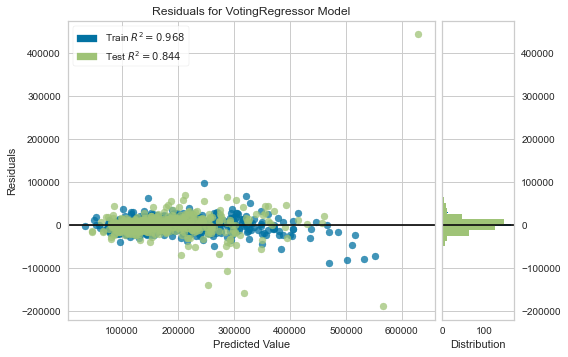

In [17]:
plot_model(blender_specific)

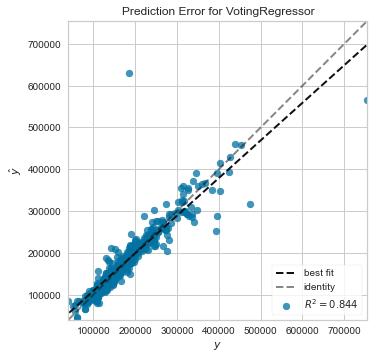

In [18]:
plot_model(blender_specific, plot = 'error')

### Prediction on test set

In [19]:
prediction= predict_model(blender_specific, data = test)
prediction

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,117491.629073
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,213360.245256
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,182660.347105
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,192351.361946
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,194742.792391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,83128.520157
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,74785.805018
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,169537.105919
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,116727.275134


### Finalizing the model

In [ ]:
final_model= finalize_model(blender_specific)

In [ ]:
final_model

### Saving the model

In [ ]:
save_model(final_model,'final_model')

### Write down the prediction into submission file

In [ ]:
output= pd.DataFrame({'Id': test.Id, 'SalePrice': prediction.Label})
output.to_csv('submission.csv', index=False)